Train: (50000, 32, 32, 3), Test: (10000, 32, 32, 3)


C:\Users\Jayson\AppData\Local\Temp\ipykernel_19452\1269252172.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])  # Affiche le nom de la classe en bas de l’image


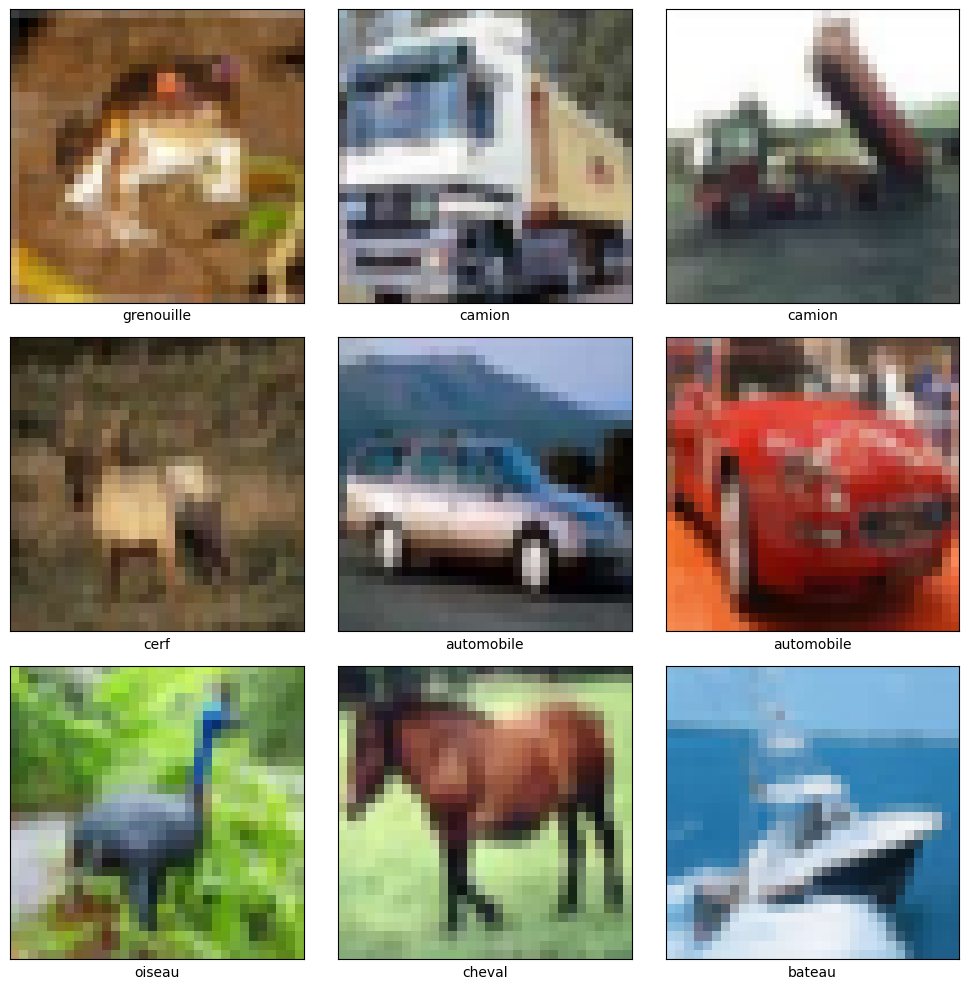

In [1]:
# 1.3.1 : Chargement et Exploration des Données

# Import des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Charger le jeu de données CIFAR-10
# x = images, y = labels (les classes de l'image)
# x_train : images pour l'entraînement
# y_train : labels pour l'entraînement
# x_test : images pour tester le modèle
# y_test : labels pour le test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Affichage des dimensions des tableaux
# Cela permet de voir combien d'images on a, et leur taille (32x32 pixels en couleur)
print(f"Train: {x_train.shape}, Test: {x_test.shape}")

# Définition des noms des classes (pour mieux afficher les images)
class_names = ['avion', 'automobile', 'oiseau', 'chat', 'cerf', 'chien', 'grenouille', 'cheval', 'bateau', 'camion']

# Afficher 9 images du dataset pour visualiser à quoi elles ressemblent
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)  # Création d'une grille 3x3
    plt.xticks([])  # On enlève les graduations sur l'axe x
    plt.yticks([])  # On enlève les graduations sur l'axe y
    plt.imshow(x_train[i])  # Affiche l'image
    plt.xlabel(class_names[int(y_train[i])])  # Affiche le nom de la classe en bas de l’image
plt.tight_layout()
plt.show()  # Affiche toutes les images


In [2]:
# 1.3.2 : Prétraitement des Données

# Normalisation des pixels
# Les pixels d’une image vont de 0 à 255 (valeurs entières)
# On divise chaque pixel par 255 pour que les valeurs soient entre 0 et 1
# → Cela aide le modèle à apprendre plus rapidement et plus efficacement
x_train = x_train / 255.0
x_test = x_test / 255.0


In [3]:
# 1.3.3 : Construction de l'Architecture CNN

model = models.Sequential([
    # Couche 1
    # Conv2D = Analyser l'image  , 32 = Nombre de filtre (3, 3) = taille du filtre par pixels , 'relu' = Comprendre des formes complexes  , (32, 32, 3) = taille de l'iamge 32 x 32 pixels et 3 couleurs (RGB rouge vert bleu)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # MaxPooling2D = rend l'image plus petit donc on divise par 2 donc l'image ce transforme en 16 X 16 px
    layers.MaxPooling2D((2, 2)),

    # Couche 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling2D = rend l'image plus petit donc on divise par 2 donc l'image ce transforme en 8 X 8 px
    layers.MaxPooling2D((2, 2)),

    # Couche 3
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Classifieur
    # Flatten = Aplatir l’image en un vecteur 1D pour pouvoir la passer à une couche Dense (réseau de neurones classique)
    layers.Flatten(),

    # Dense = Couche de neurones entièrement connectée
    # 64 = nombre de neurones qui vont apprendre des combinaisons plus abstraites
    # 'relu' = active seulement les neurones utiles pour garder la non-linéarité
    layers.Dense(64, activation='relu'),

    # Dernière couche Dense = prédiction finale
    # 10 = car il y a 10 classes (avion, voiture, oiseau, etc.)
    # 'softmax' = transforme les scores en probabilités (pour chaque classe)
    layers.Dense(10, activation='softmax')
])

# Affichage du résumé du modèle (nombre de paramètres et forme des couches)
model.summary()

C:\Users\Jayson\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 1.3.4 : Callbacks, Compilation et Entraînement

# Callbacks = outils qui surveillent l'entraînement du modèle

# ModelCheckpoint = enregistre automatiquement le "meilleur modèle" dans un fichier
# ici, "best_cnn_model.keras" sera sauvegardé seulement si la performance s'améliore
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("best_cnn_model.keras", save_best_only=True)

# EarlyStopping = arrête l'entraînement si le modèle ne s'améliore plus pendant 3 époques
# restore_best_weights = reprend les meilleurs poids trouvés avant l'arrêt
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

# Compilation du modèle
# optimizer='adam' = méthode pour améliorer les poids automatiquement
# learning_rate = 0.001 par defaut 
# loss='sparse_categorical_crossentropy' = utilisée pour des labels sous forme d'entiers
# metrics=['accuracy'] = on suit la précision pendant l'entraînement
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
# epochs=15 = nombre de fois où on va parcourir toutes les images d'entraînement
# validation_data = permet de voir si le modèle est bon aussi sur des images "jamais vues"
# callbacks = active les outils de surveillance (checkpoint, early stopping)
history = model.fit(x_train, y_train,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_cb, earlystop_cb])


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3624 - loss: 1.7334 - val_accuracy: 0.5566 - val_loss: 1.2478
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5782 - loss: 1.1915 - val_accuracy: 0.6180 - val_loss: 1.0793
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6393 - loss: 1.0207 - val_accuracy: 0.6454 - val_loss: 1.0049
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6729 - loss: 0.9304 - val_accuracy: 0.6713 - val_loss: 0.9411
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7041 - loss: 0.8382 - val_accuracy: 0.6760 - val_loss: 0.9372
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7270 - loss: 0.7754 - val_accuracy: 0.6850 - val_loss: 0.9335
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7442 - loss: 0.7270 - val_accuracy: 0.7055 - val_loss: 0.8548
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7629 - loss: 0.

313/313 - 1s - 3ms/step - accuracy: 0.7055 - loss: 0.8548

Test accuracy: 0.7055


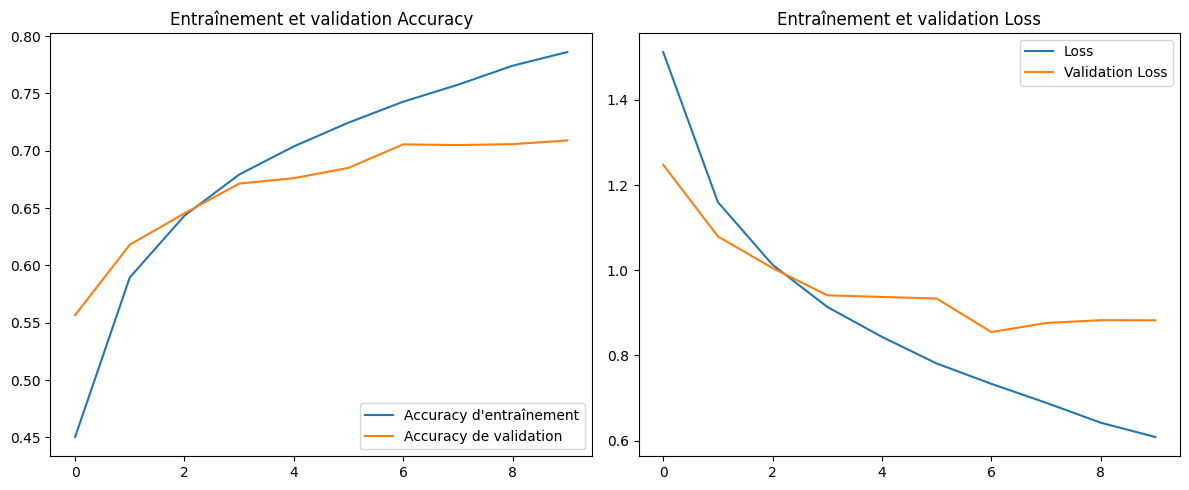

In [5]:
# E1.3.5 : Évaluation et Analyse / Courbes

# Évaluer le modèle sur les données de test (jamais vues par le modèle)
# test_loss = la perte (à quel point le modèle se trompe)
# test_acc = la précision (taux de bonnes réponses)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')  # Affichage avec 4 chiffres après la virgule

# Affichage des courbes d'apprentissage pour mieux comprendre le comportement du modèle
plt.figure(figsize=(12, 5))  # Largeur x hauteur de l'image

# Graphique de précision
# On compare la précision pendant l'entraînement et pendant la validation
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy d\'entraînement')  # Précision sur l'entraînement
plt.plot(history.history['val_accuracy'], label='Accuracy de validation')  # Sur les données test
plt.legend(loc='lower right')  # Position de la légende
plt.title('Entraînement et validation Accuracy')  # Titre du graphique

# Graphique de perte (loss)
# Permet de voir si le modèle apprend ou s’il stagne
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')  # Perte sur les données d’entraînement
plt.plot(history.history['val_loss'], label='Validation Loss')  # Perte sur les données de test
plt.legend(loc='upper right')
plt.title('Entraînement et validation Loss')

plt.tight_layout()  # Pour ne pas que les graphes se chevauchent
plt.show()  # Affiche le tout

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


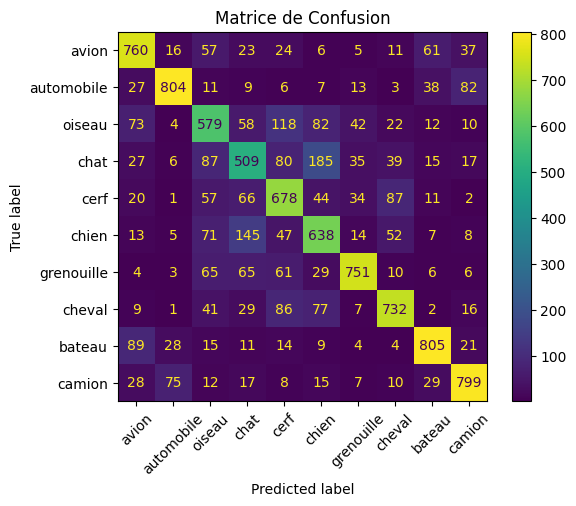

In [6]:
# 1.3.6 Matrice de confusion

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédictions sur les images de test
# model.predict() donne un tableau avec les probabilités pour chaque classe
# np.argmax() récupère la classe avec la plus grande probabilité (prédiction finale)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Création de la matrice de confusion
# Compare les vraies classes (y_test) avec les classes prédites (y_pred_classes)
cm = confusion_matrix(y_test, y_pred_classes)

# Affichage de la matrice sous forme graphique
# display_labels = noms des classes à afficher (ex: avion, chien, etc.)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Affichage avec rotation des étiquettes
disp.plot(xticks_rotation=45)
plt.title("Matrice de Confusion")
plt.show()  # Affiche le graphique


In [7]:
# Etape 1.3.7 : Apprentissage par Transfert avec MobileNetV2

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# 1. Charger un modèle pré-entraîné (MobileNetV2)
# include_top=False = on ne garde pas la dernière couche (celle qui fait la classification sur ImageNet)
# input_shape = taille des images d'entrée (CIFAR-10 = 32x32 pixels en couleurs)
# weights='imagenet' = on utilise les poids appris à partir du gros dataset ImageNet
base_model = MobileNetV2(input_shape=(32, 32, 3),
                         include_top=False,
                         weights='imagenet')

# 2. Geler la base convolutive (ne pas l'entraîner à nouveau)
# On garde les poids déjà appris, donc on met trainable = False
base_model.trainable = False

# 3. Ajouter notre propre tête de classification (adaptée à CIFAR-10)
# On ajoute nos couches "au-dessus" du modèle pour adapter la sortie à nos 10 classes
model_transfer = models.Sequential([
    base_model,  # modèle de base gelé
    layers.GlobalAveragePooling2D(),  # réduit les dimensions tout en gardant les infos importantes
    layers.Dense(64, activation='relu'),  # couche Dense pour apprendre des combinaisons utiles
    layers.Dropout(0.3),  # dropout pour éviter le sur-apprentissage
    layers.Dense(10, activation='softmax')  # couche finale avec 10 sorties (1 par classe)
])

# 4. Compiler le modèle
# optimizer = Adam, loss = pour classification multi-classe, metric = accuracy
model_transfer.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Afficher le résumé du modèle complet
model_transfer.summary()


C:\Users\Jayson\AppData\Local\Temp\ipykernel_19452\2726615307.py:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(32, 32, 3),


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,340,618 (8.93 MB)

 Trainable params: 82,634 (322.79 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
# 1.3.8 Tensorboard
import datetime
from tensorflow.keras.callbacks import TensorBoard

# --- Configuration du callback TensorBoard ---
# Crée un dossier unique pour chaque entraînement, avec la date et l'heure
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Création du callback
# histogram_freq=1 permet de suivre l’évolution des poids
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# --- Réutilisation des autres callbacks ---
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("best_transfer_model.keras", save_best_only=True)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

# --- Entraînement du modèle avec les 3 callbacks ---
history_transfer = model_transfer.fit(x_train, y_train,
                                      validation_data=(x_test, y_test),
                                      epochs=15,
                                      callbacks=[checkpoint_cb, earlystop_cb, tensorboard_callback])



Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.2445 - loss: 2.0775 - val_accuracy: 0.3156 - val_loss: 1.8895
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.3107 - loss: 1.8986 - val_accuracy: 0.3247 - val_loss: 1.8631
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.3200 - loss: 1.8615 - val_accuracy: 0.3316 - val_loss: 1.8409
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.3306 - loss: 1.8439 - val_accuracy: 0.3388 - val_loss: 1.8337
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.3330 - loss: 1.8311 - val_accuracy: 0.3413 - val_loss: 1.8259
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.3358 - loss: 1.8234 - val_accuracy: 0.3456 - val_loss: 1.8190
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.3421 - loss: 1.8115 - val_accuracy: 0.3437 - val_loss: 1.8155
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.3465 -

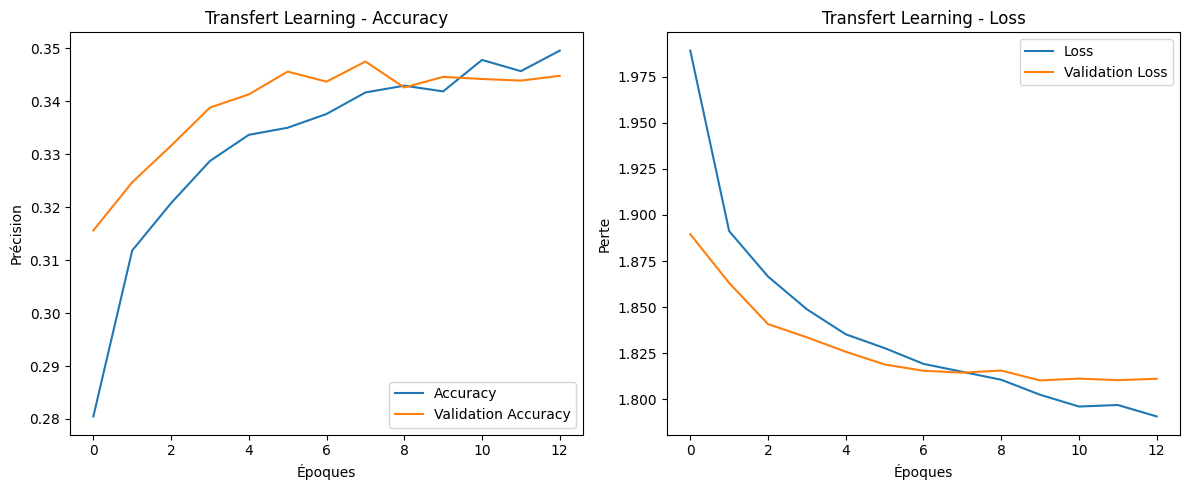

In [9]:
import matplotlib.pyplot as plt

# Visualisation des courbes d'entraînement pour le modèle avec transfert
plt.figure(figsize=(12, 5))

# Précision (accuracy)
plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['accuracy'], label='Accuracy')
plt.plot(history_transfer.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfert Learning - Accuracy')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend(loc='lower right')

# Perte (loss)
plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['loss'], label='Loss')
plt.plot(history_transfer.history['val_loss'], label='Validation Loss')
plt.title('Transfert Learning - Loss')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam, SGD, Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
import pandas as pd
import numpy as np
import itertools

# --- Paramètres à tester ---
optimizers_dict = {
    'Adam': Adam,
    'SGD': lambda lr: SGD(learning_rate=lr, momentum=0.9),
    'Adamax': Adamax
}
learning_rates = [0.01, 0.03, 0.05, 0.001, 0.005]
epochs_list = [20, 30, 40, 50, 60]

# --- Fonction pour créer le modèle de transfert avec hyperparams dynamiques ---
def create_model(lr, optimizer_name):
    base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])

    optimizer_class = optimizers_dict[optimizer_name]
    optimizer = optimizer_class(learning_rate=lr)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# --- Callbacks communs ---
def get_callbacks():
    return [
        EarlyStopping(patience=3, restore_best_weights=True, verbose=0),
        ModelCheckpoint("temp_model.keras", save_best_only=True, verbose=0)
    ]

# --- Tester toutes les combinaisons ---
results = []

for optimizer_name, lr, epochs in itertools.product(optimizers_dict.keys(), learning_rates, epochs_list):
    print(f"Training with optimizer={optimizer_name}, lr={lr}, epochs={epochs}")
    model = create_model(lr, optimizer_name)
    
    history = model.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=epochs,
                        callbacks=get_callbacks(),
                        verbose=0)

    # Évaluer le modèle
    final_loss, final_acc = model.evaluate(x_test, y_test, verbose=0)
    
    results.append({
        'Optimizer': optimizer_name,
        'Learning Rate': lr,
        'Epochs': epochs,
        'Validation Loss': final_loss,
        'Validation Accuracy': final_acc
    })

# --- Résultat sous forme de tableau ---
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by='Validation Loss').reset_index(drop=True)

# Afficher les 10 meilleures combinaisons
print("Top 10 résultats :")
print(df_results_sorted.head(10))


Training with optimizer=Adam, lr=0.01, epochs=20


C:\Users\Jayson\AppData\Local\Temp\ipykernel_19452\1983000528.py:21: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(32, 32, 3))


Training with optimizer=Adam, lr=0.01, epochs=30
Training with optimizer=Adam, lr=0.01, epochs=40
Training with optimizer=Adam, lr=0.01, epochs=50
Training with optimizer=Adam, lr=0.01, epochs=60
Training with optimizer=Adam, lr=0.03, epochs=20
Training with optimizer=Adam, lr=0.03, epochs=30
Training with optimizer=Adam, lr=0.03, epochs=40
Training with optimizer=Adam, lr=0.03, epochs=50
Training with optimizer=Adam, lr=0.03, epochs=60
Training with optimizer=Adam, lr=0.05, epochs=20
Training with optimizer=Adam, lr=0.05, epochs=30
Training with optimizer=Adam, lr=0.05, epochs=40
Training with optimizer=Adam, lr=0.05, epochs=50
Training with optimizer=Adam, lr=0.05, epochs=60
Training with optimizer=Adam, lr=0.001, epochs=20
Training with optimizer=Adam, lr=0.001, epochs=30
Training with optimizer=Adam, lr=0.001, epochs=40
Training with optimizer=Adam, lr=0.001, epochs=50
Training with optimizer=Adam, lr=0.001, epochs=60
Training with optimizer=Adam, lr=0.005, epochs=20
Training with 

TypeError: <lambda>() got an unexpected keyword argument 'learning_rate'